In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("/content/used_cars.csv")

In [81]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [82]:
df.shape

(4009, 12)

In [83]:
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [84]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

####Handling Missing values

In [85]:
#find the most freq value in fuel_type
mode_ft = df['fuel_type'].value_counts().idxmax()
mode_ft

'Gasoline'

In [86]:
#Fill null
df['fuel_type'].fillna(mode_ft, inplace = True)

In [87]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [88]:
#replace dash and not supported values in fuel_type with 'Electric'
df['fuel_type'].replace('–', 'Electric', inplace = True)

In [89]:
#replace not supported in fuel_type with 'Electric'
df['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [90]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Electric            47
Plug-In Hybrid      34
Name: count, dtype: int64

In [91]:
#Drop null from clean_title and accident column
df.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

In [92]:
#remove the $ and , sign from price column and convert to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['price']

0        10300.0
1        38005.0
3        15500.0
6        31000.0
7         7300.0
          ...   
4003     25900.0
4004    349950.0
4005     53900.0
4007     62999.0
4008     40000.0
Name: price, Length: 3413, dtype: float64

In [93]:
#remove "mi" from milage column
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi', '').astype(float)
df['milage']

0        51000.0
1        34742.0
3        88900.0
6        84000.0
7       242000.0
          ...   
4003     53705.0
4004       714.0
4005     10900.0
4007     33000.0
4008     43000.0
Name: milage, Length: 3413, dtype: float64

In [94]:
df['model'].nunique()

1679

In [95]:
df['model'] = df.groupby('model')['price'].transform('mean')

In [96]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,10633.333333,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,33201.666667,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
3,INFINITI,15500.000000,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
6,Audi,26250.000000,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0
7,BMW,7300.000000,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0


In [97]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

**>Function**

The above function is specifically crafted to extract Horsepower and Engine Displacement from engine column, based on specific characters.

In [98]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement
0,Ford,10633.333333,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.0,3.7L
1,Hyundai,33201.666667,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,None,3.8L
3,INFINITI,15500.000000,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.0,3.5L
6,Audi,26250.000000,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.0,2.0L
7,BMW,7300.000000,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0,282.0,4.4L


In [99]:
df['Horsepower'].isnull().sum()

242

In [100]:
#convert dtype of Horsepower to float
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].dtype


dtype('float64')

In [101]:
#fill NULL
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace = True)
df['Horsepower'].isnull().sum()

0

In [102]:
#strip the L from Engine_Displacement
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [103]:
#Change the dtype of Engine_Displacement to numeric
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

In [104]:
#FILL NULL
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)

In [105]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement
0,Ford,10633.333333,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7
1,Hyundai,33201.666667,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8
3,INFINITI,15500.000000,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5
6,Audi,26250.000000,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0
7,BMW,7300.000000,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4


In [106]:
#drop engine column
df.drop('engine', axis = 1, inplace = True)

In [107]:
df.shape

(3413, 13)

In [108]:
#Calculates age and create column age
df['age'] = 2023 - df['model_year']

In [109]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,age
0,Ford,10633.333333,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7,10
1,Hyundai,33201.666667,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8,2
3,INFINITI,15500.000000,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5,8
6,Audi,26250.000000,2017,84000.0,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0,6
7,BMW,7300.000000,2001,242000.0,Gasoline,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4,22


In [110]:
#remove model_year column
df.drop('model_year', axis = 1, inplace = True)

In [111]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,age
0,Ford,10633.333333,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7,10
1,Hyundai,33201.666667,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8,2
3,INFINITI,15500.000000,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5,8
6,Audi,26250.000000,84000.0,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0,6
7,BMW,7300.000000,242000.0,Gasoline,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4,22


### **Exploratory Data Analysis**

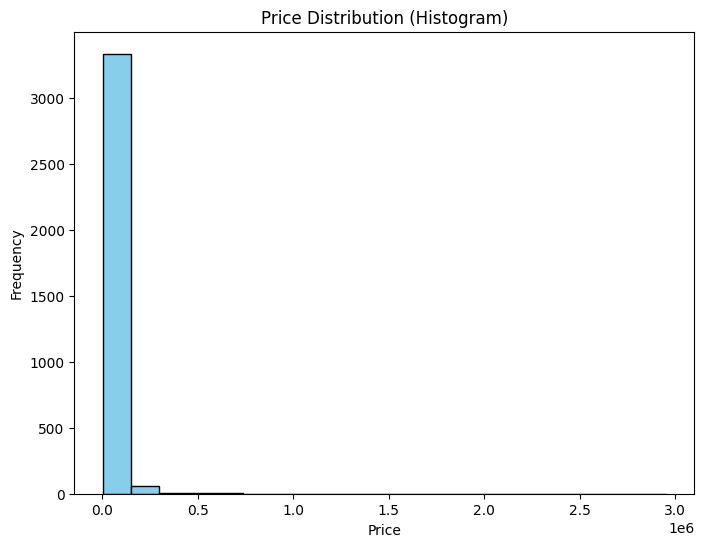

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




**>INSIGHTS**

Above Histogram shows that most cars lie in the lower range of price.

The data has too many outliers as seen from the above graph and hence needs to be removed - to get near normal distribution.

<ipython-input-113-1a9f10fadf60>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], color='purple', shade=True)


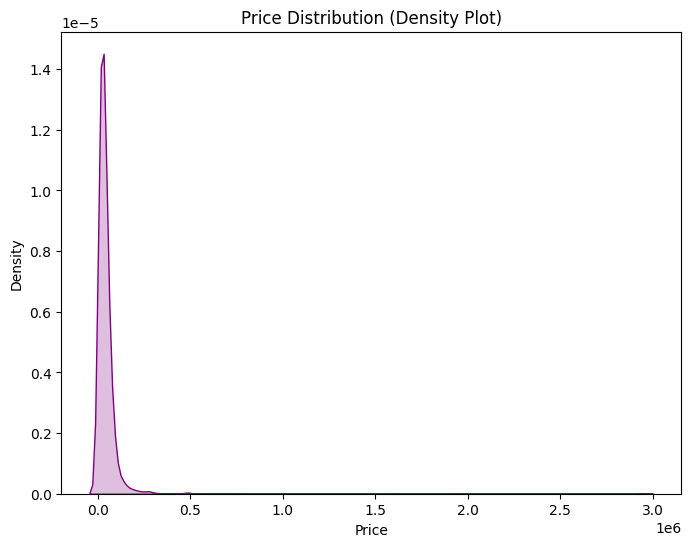

In [113]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'], color='purple', shade=True)
plt.title('Price Distribution (Density Plot)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**>INSIGHTS**

Above plot - Density Distribution plot for price.

Again it shows are very right skewed distribution and a very narrow line that extends to the right corner of the graph.

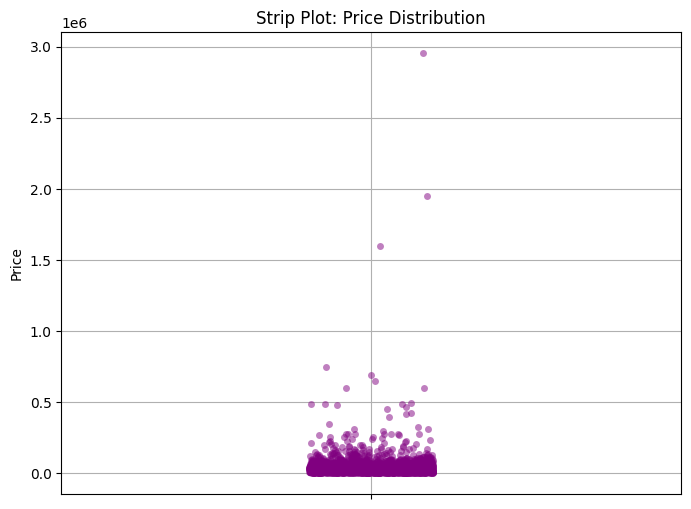

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a strip plot for the 'price' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**>STRIP PLOT**

A great way to visualize the spread of numerical data.

The above plot shows how far the values are from the mean values - too many outliers.

In [115]:
df['price'].describe()

count    3.413000e+03
mean     4.173439e+04
std      8.147277e+04
min      2.000000e+03
25%      1.590000e+04
50%      2.900000e+04
75%      4.750000e+04
max      2.954083e+06
Name: price, dtype: float64

**>OUTLIERS REMOVAL METHOD - IQR METHOD**

The above graph has outliers from 0.4 onwards, which need to be removed

In [117]:
#identify and remove outliers from the data df in relation to price column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31600.0


In [118]:
#use IQR value to filter out the outliers
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 0.7 * IQR)))]
df.shape

(3012, 13)

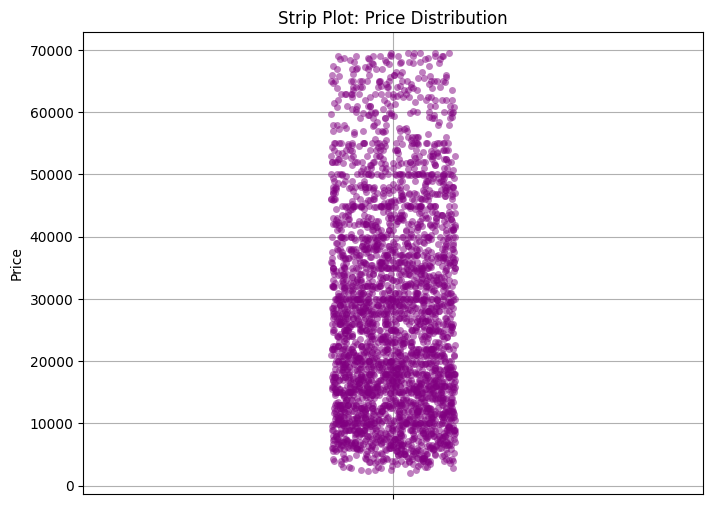

In [119]:
#strip plot after removing outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Create a strip plot for the 'price' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

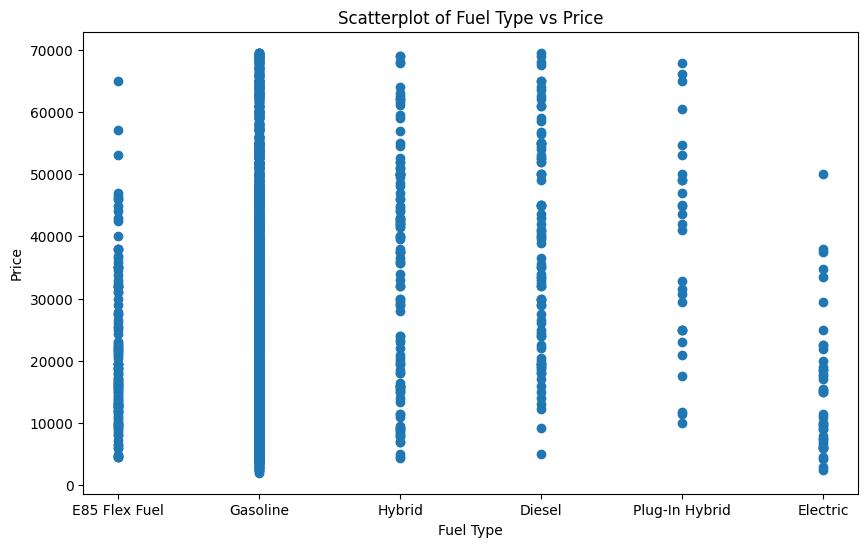

In [120]:
#visualize fuel_type column in regrads to price
plt.figure(figsize = (10, 6))
plt.scatter(df['fuel_type'], df['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


**>INSIGHTS:**

The above scatter plot shows that - Gasoline has more consistant values and have a larger range of car prices.

A near similar pattern can be seen in Hybrid type.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'E85 Flex Fuel'),
  Text(1, 0, 'Gasoline'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Diesel'),
  Text(4, 0, 'Plug-In Hybrid'),
  Text(5, 0, 'Electric')])

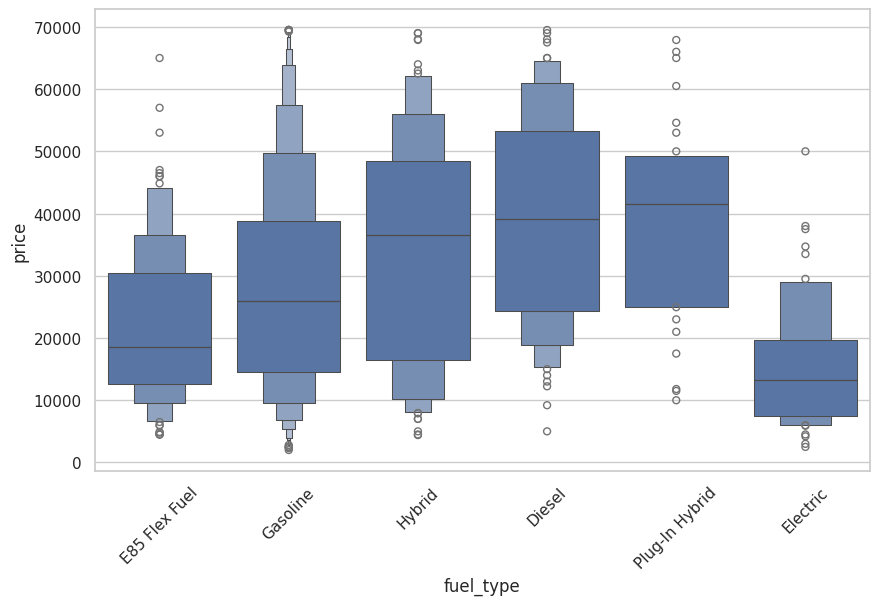

In [121]:
#create a boxplot of fuel_type vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxenplot(x = 'fuel_type', y = 'price', data =df)
plt.xticks(rotation=45)


**>BOXPLOT - INSIGHTS**

* The above Boxplot shows that the mean price for Plug-In Hybrid is the highest among all.

* Meanwhile, Gasoline has a larger range.

In [122]:
df.shape

(3012, 13)

In [123]:
import pandas as pd

# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()
Q3 = df['price'].quantile(0.75)

# Define a function to categorize data points into quartiles
def categorize_quartile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"

# Apply the categorize_quartile function to the 'price' column
df['Quartile'] = df['price'].apply(categorize_quartile)

# Count the number of data points in each quartile
quartile_counts = df['Quartile'].value_counts().reset_index()
quartile_counts.columns = ['Quartile', 'Count']

# Display the quartile distribution table
print(quartile_counts)


    Quartile  Count
0  Q4 (100%)    756
1   Q2 (50%)    753
2   Q3 (75%)    752
3   Q1 (25%)    751


In [124]:
df.describe()


,model,milage,price,Horsepower,Engine_Displacement,age
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000
mean,29642.797450,77291.058433,28132.581341,311.610244,3.633475,8.772576
std,30228.951724,52443.195071,16577.205102,97.464659,1.369728,6.046516
min,2000.000000,100.000000,2000.000000,70.000000,0.650000,-1.000000
25%,15993.750000,37056.250000,14900.000000,245.000000,2.500000,4.000000
50%,26318.250000,68500.000000,25900.000000,308.000000,3.500000,7.000000
75%,39136.833333,107000.000000,39500.000000,365.000000,4.600000,12.000000
max,996194.333333,405000.000000,69500.000000,778.000000,8.300000,31.000000


In [125]:
#value counts of clean_title column
df['clean_title'].value_counts()


clean_title
Yes    3012
Name: count, dtype: int64

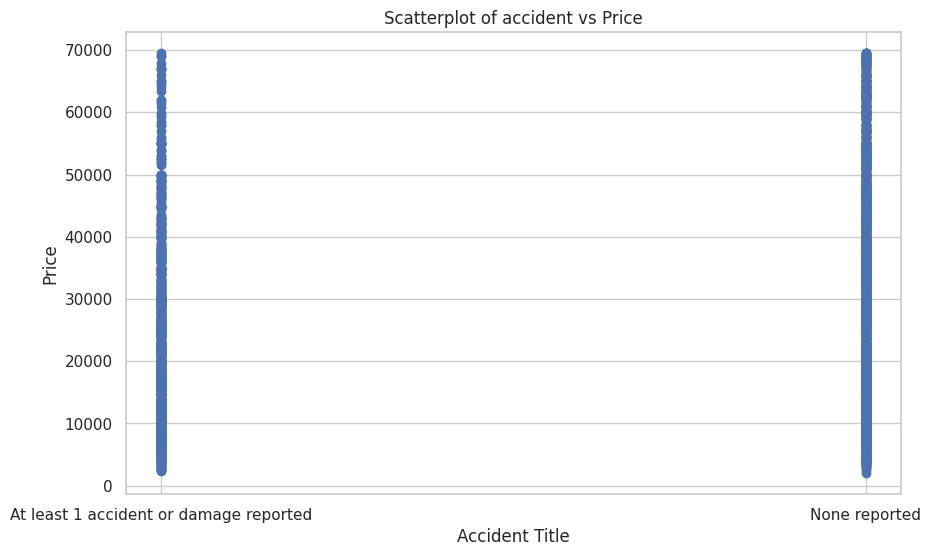

In [126]:
# scatterplot of clean_title vs price
plt.figure(figsize = (10, 6))
plt.scatter(df['accident'], df['price'])
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident Title')
plt.ylabel('Price')
plt.show()


In [127]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,age,Quartile
0,Ford,10633.333333,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.7,10,Q1 (25%)
1,Hyundai,33201.666667,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,331.445122,3.8,2,Q3 (75%)
3,INFINITI,15500.000000,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.5,8,Q2 (50%)
6,Audi,26250.000000,84000.0,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,292.000000,2.0,6,Q3 (75%)
7,BMW,7300.000000,242000.0,Gasoline,A/T,Green,Green,None reported,Yes,7300.0,282.000000,4.4,22,Q1 (25%)


In [128]:
df['clean_title'].nunique()

1

In [129]:
#drop clean_title column , accident column and Quartile column
df.drop(['clean_title', 'accident', 'Quartile'], axis = 1, inplace = True)


In [62]:
df

,brand,model,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age
0,Ford,10633.333333,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10
1,Hyundai,33201.666667,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2
3,INFINITI,15500.000000,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8
6,Audi,26250.000000,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6
7,BMW,7300.000000,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22
...,...,...,...,...,...,...,...,...,...,...,...
4001,Volkswagen,4250.000000,194000.0,Gasoline,Transmission w/Dual Shift Mode,Black,Gray,3500.0,283.000000,3.6,12
4003,Mercedes-Benz,30800.000000,53705.0,Gasoline,A/T,Black,Black,25900.0,241.000000,2.0,5
4005,Audi,33024.000000,10900.0,Gasoline,Transmission w/Dual Shift Mode,Black,Black,53900.0,349.000000,3.0,1
4007,Ford,67948.800000,33000.0,Gasoline,A/T,Blue,Black,62999.0,450.000000,3.5,3


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

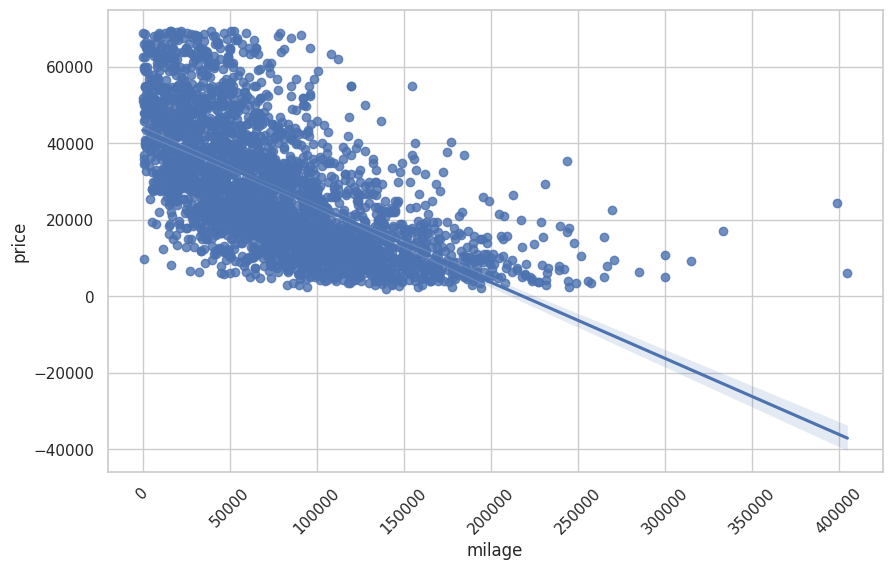

In [130]:
#draw and regression plot of milage vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'milage', y = 'price', data =df)
plt.xticks(rotation=45)


**>INSIGHTS**

The regression plot above shows that - the more miles the car has driven - the lesser the selling price.

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

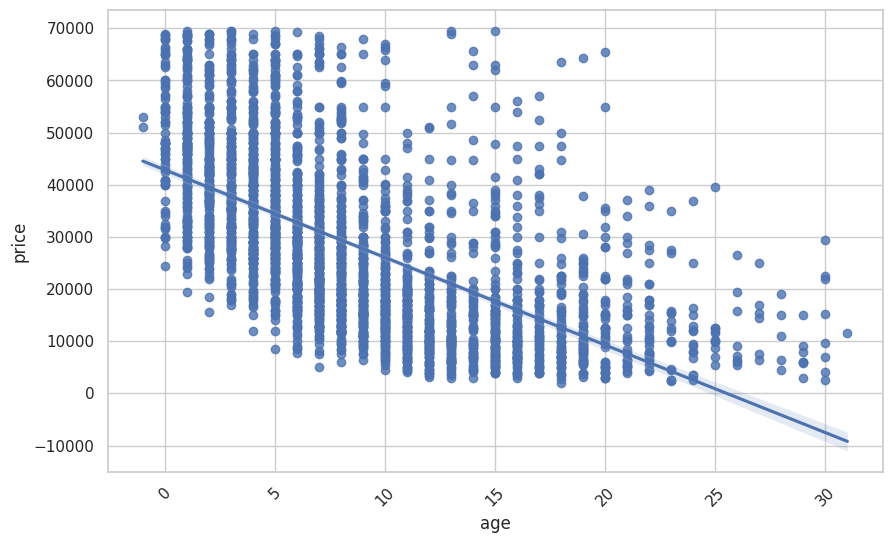

In [131]:
#draw and regression plot of age vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'age', y = 'price', data =df)
plt.xticks(rotation=45)


**>INSIGHTS**

Regression Plot - 'age' vs 'price'

The older the car - the lesser the selling price.

(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60')])

<Figure size 1000x600 with 0 Axes>

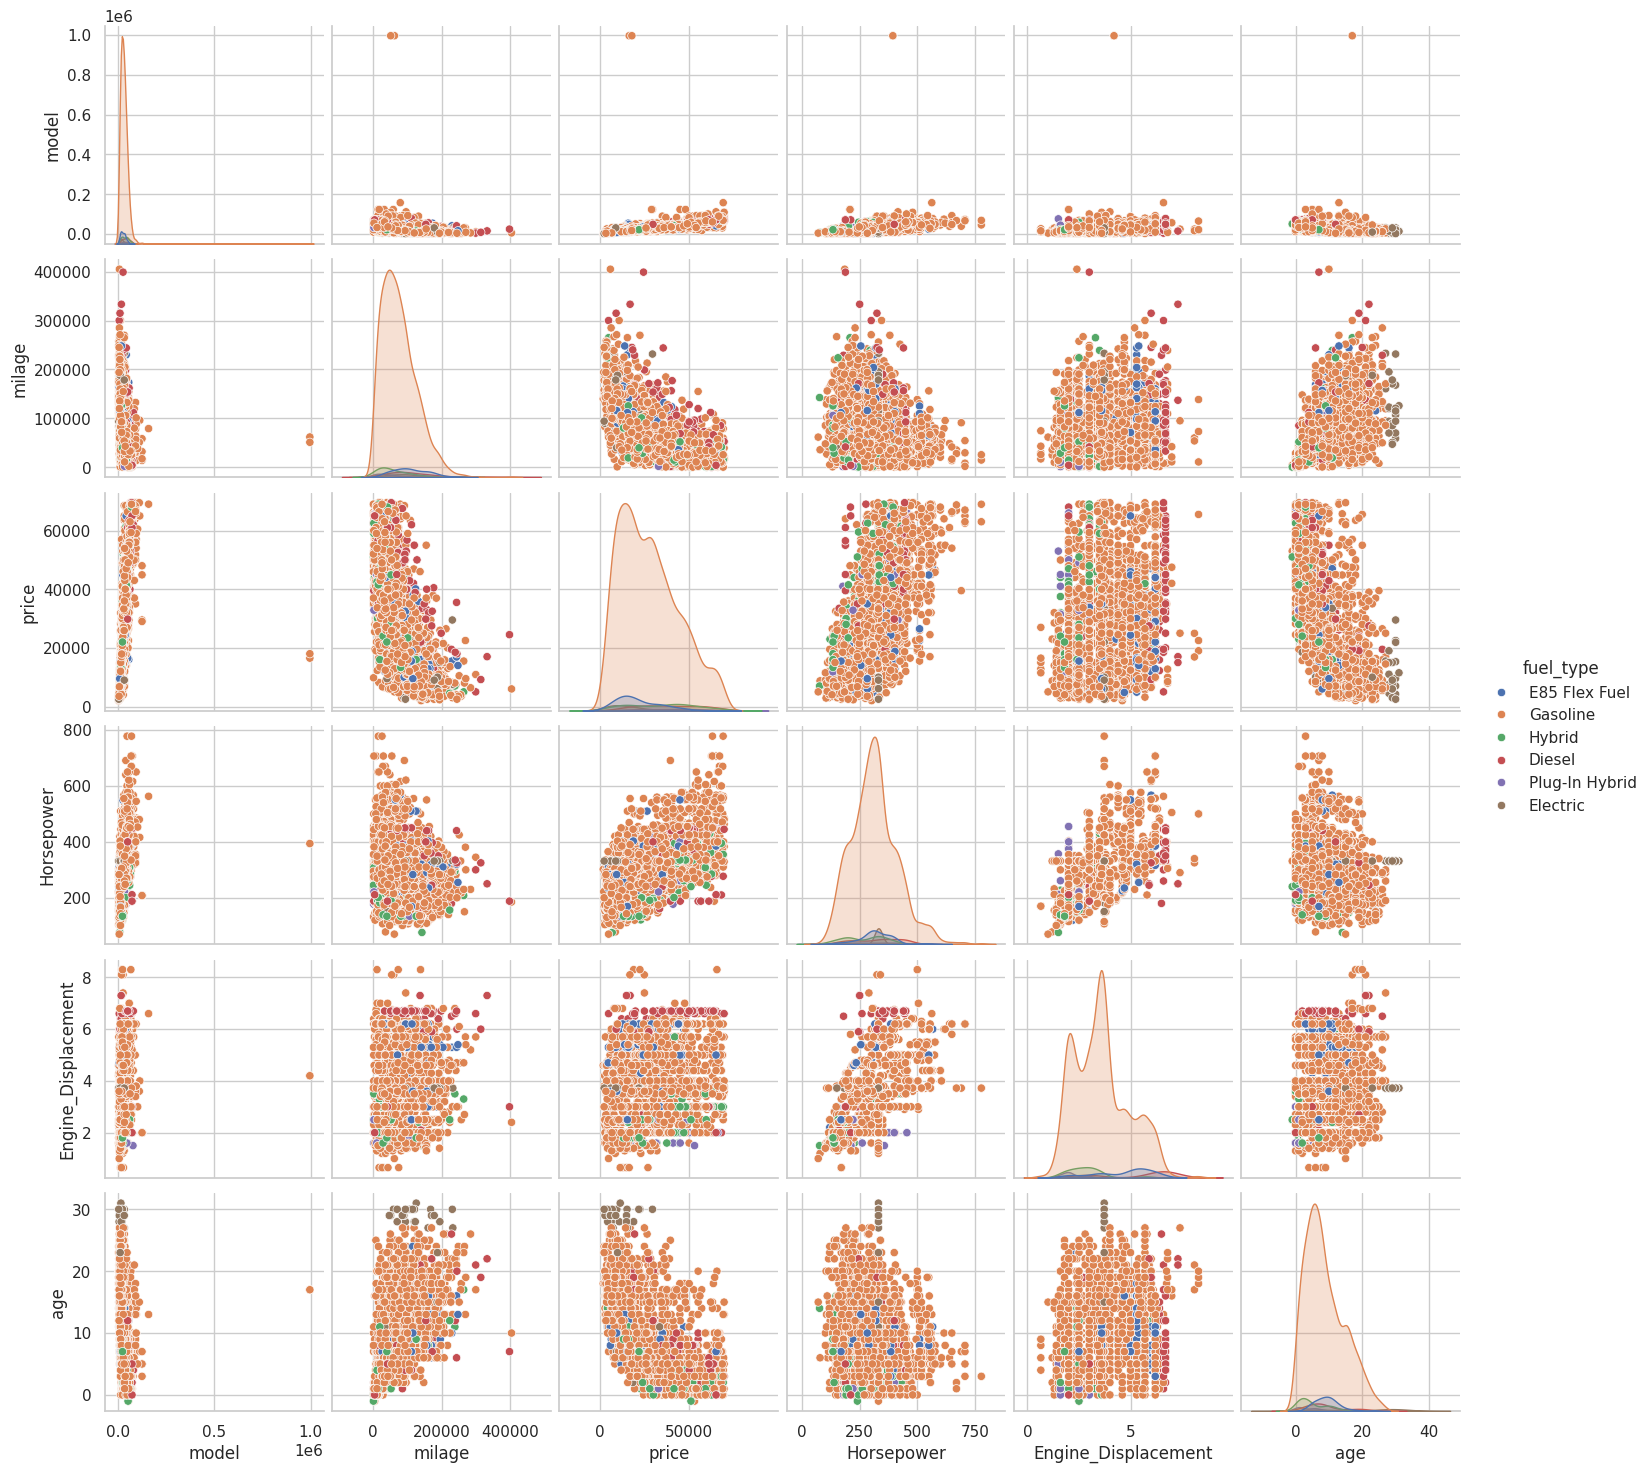

In [132]:
#draw a pairplot of all the features in df except brand, transmission
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue = 'fuel_type')
plt.xticks(rotation=45)


**INSIGHTS:**

* The pairplots above show the dominance of Gasoline fuel type cars in relation to car price, engine_displacement, age, Horsepower & milage.
* It means that if one wants to sell a car - he would sell it at higher price if it is Gasoline fuel type, lower age, lower milage, higher engine displacement.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

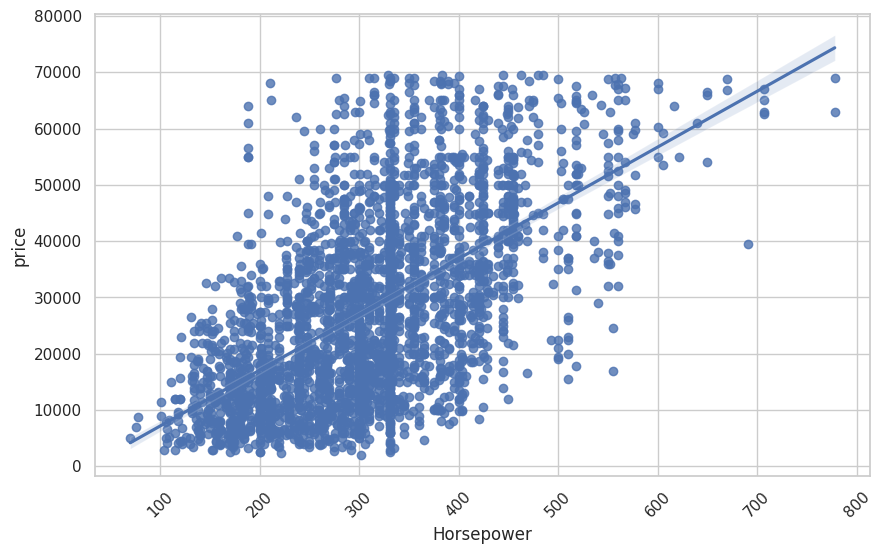

In [133]:
#draw a regressionplot of Horsepower vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Horsepower', y = 'price', data =df)
plt.xticks(rotation=45)


INSIGHTS:

* The price increases with increase in engine Horsepower.

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

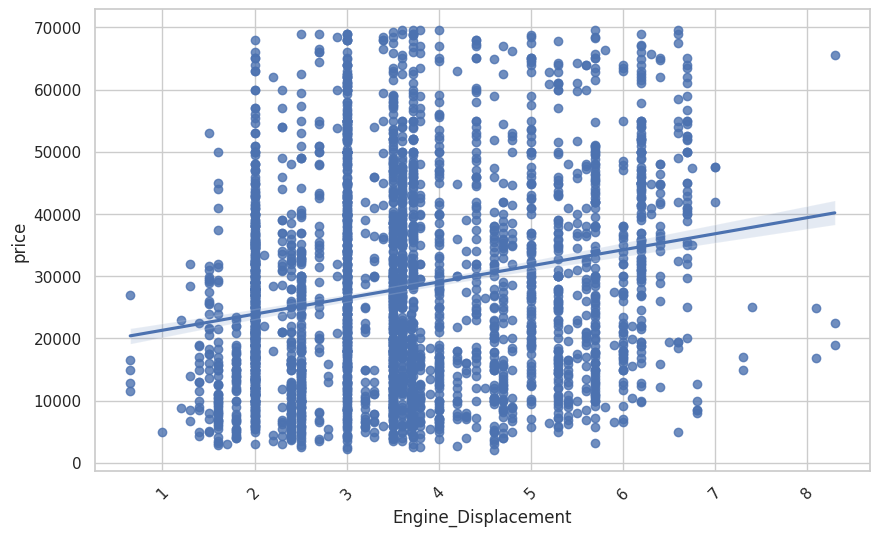

In [134]:
#draw a scatter plot of Engine_Displacement vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Engine_Displacement', y = 'price', data =df)
plt.xticks(rotation=45)


>INSIGHTS

The larger the engine size the higher the price.

In [135]:
df.describe()

,model,milage,price,Horsepower,Engine_Displacement,age
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000
mean,29642.797450,77291.058433,28132.581341,311.610244,3.633475,8.772576
std,30228.951724,52443.195071,16577.205102,97.464659,1.369728,6.046516
min,2000.000000,100.000000,2000.000000,70.000000,0.650000,-1.000000
25%,15993.750000,37056.250000,14900.000000,245.000000,2.500000,4.000000
50%,26318.250000,68500.000000,25900.000000,308.000000,3.500000,7.000000
75%,39136.833333,107000.000000,39500.000000,365.000000,4.600000,12.000000
max,996194.333333,405000.000000,69500.000000,778.000000,8.300000,31.000000


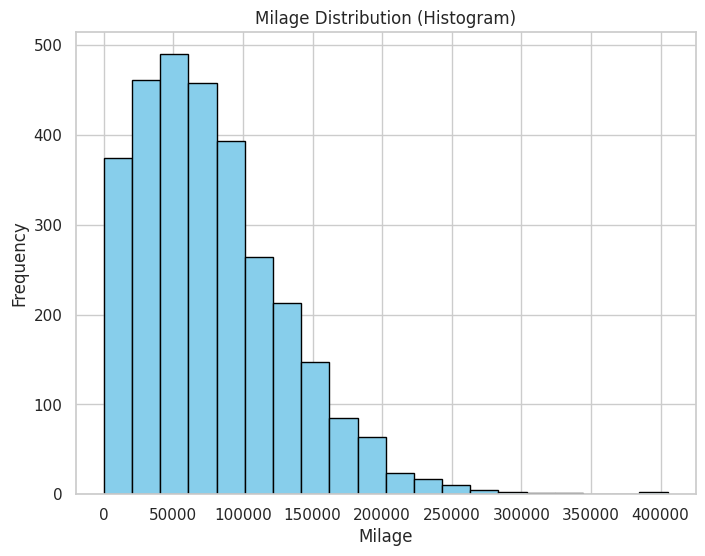

In [136]:
#create a histogram for milage column
plt.figure(figsize=(8, 6))
plt.hist(df['milage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()


Majority of the cars have lesser milage.

### Causation and Correlation

In [137]:
from scipy import stats
#to find pearson coefficent - Horsepower and Price
pearson_coef, p_value = stats.pearsonr(df['Horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5825360064013879  with a P-value of P = 2.8563798072913555e-273


The correlation is not moderate and the evidence for it's significance is very strong.

In [138]:
#to find pearson coefficent - age and price
pearson_coef, p_value = stats.pearsonr(df['age'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6124940407114035  with a P-value of P = 1.0445219822256e-309


A moderatly strong negative correlation with high evidence for it's significance.

In [139]:
#to find pearson coefficent - milage and price
pearson_coef, p_value = stats.pearsonr(df['milage'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6294256145541731  with a P-value of P = 0.0


A very strong evidence that the above correlation exists.

In [140]:
#to find pearson coefficent - engine displacement
pearson_coef, p_value = stats.pearsonr(df['Engine_Displacement'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.21353932547925553  with a P-value of P = 2.114116109008894e-32


A weaker positive correlation with significant evidence of it's existence.

### **Preprocessing**

In [141]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age
0,Ford,10633.333333,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0,300.000000,3.7,10
1,Hyundai,33201.666667,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2
3,INFINITI,15500.000000,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0,354.000000,3.5,8
6,Audi,26250.000000,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0,292.000000,2.0,6
7,BMW,7300.000000,242000.0,Gasoline,A/T,Green,Green,7300.0,282.000000,4.4,22


In [142]:
df["brand"].unique(),df['fuel_type'].unique(),df['transmission'].unique()

(array(['Ford', 'Hyundai', 'INFINITI', 'Audi', 'BMW', 'Lexus', 'Toyota',
        'Lincoln', 'Land', 'Dodge', 'Nissan', 'Jaguar', 'Chevrolet',
        'Mercedes-Benz', 'Kia', 'Jeep', 'MINI', 'Porsche', 'Hummer',
        'Chrysler', 'Acura', 'Volvo', 'Cadillac', 'Maserati', 'Genesis',
        'Volkswagen', 'GMC', 'Bentley', 'RAM', 'Subaru', 'Alfa', 'Tesla',
        'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Honda', 'Buick',
        'Aston', 'Lotus', 'Rolls-Royce', 'Pontiac', 'FIAT', 'Karma',
        'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach', 'Suzuki'],
       dtype=object),
 array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
        'Electric'], dtype=object),
 array(['6-Speed A/T', '8-Speed Automatic', '7-Speed A/T', 'A/T',
        'Transmission w/Dual Shift Mode', '6-Speed M/T', '8-Speed A/T',
        'Automatic', '10-Speed A/T', '9-Speed A/T', '5-Speed A/T',
        '6-Speed Automatic with Auto-Shift', 'M/T', 'CVT Transmission',
        '4-Speed A/T', '6

####Apply target encoding to fuel_type, Transmission, brand columns in relation to price

In [143]:
df['brand'] = df.groupby('brand')['price'].transform('mean')
df['fuel_type'] = df.groupby('fuel_type')['price'].transform('mean')
df['transmission'] = df.groupby('transmission')['price'].transform('mean')
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,age
0,30787.469512,10633.333333,51000.0,21664.007874,23625.939306,Black,Black,10300.0,300.000000,3.7,10
1,18292.666667,33201.666667,34742.0,27922.857525,37211.106383,Moonlight Cloud,Gray,38005.0,331.445122,3.8,2
3,21796.148148,15500.000000,88900.0,34204.779817,32901.618497,Black,Black,15500.0,354.000000,3.5,8
6,29660.239726,26250.000000,84000.0,27922.857525,23625.939306,Blue,Black,31000.0,292.000000,2.0,6
7,30589.837456,7300.000000,242000.0,27922.857525,24175.910160,Green,Green,7300.0,282.000000,4.4,22


In [145]:
#drop ext_col and int_col
df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)
df.head()

,brand,model,milage,fuel_type,transmission,price,Horsepower,Engine_Displacement,age
0,30787.469512,10633.333333,51000.0,21664.007874,23625.939306,10300.0,300.000000,3.7,10
1,18292.666667,33201.666667,34742.0,27922.857525,37211.106383,38005.0,331.445122,3.8,2
3,21796.148148,15500.000000,88900.0,34204.779817,32901.618497,15500.0,354.000000,3.5,8
6,29660.239726,26250.000000,84000.0,27922.857525,23625.939306,31000.0,292.000000,2.0,6
7,30589.837456,7300.000000,242000.0,27922.857525,24175.910160,7300.0,282.000000,4.4,22


#### **Linear Regression Model Preparation**

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,brand,model,milage,fuel_type,transmission,price,Horsepower,Engine_Displacement,age
0,0.402929,0.008684,0.125710,0.257932,0.216726,0.122963,0.324859,0.398693,0.34375
1,0.207698,0.031384,0.085557,0.527514,0.515531,0.533407,0.369273,0.411765,0.09375
2,0.262440,0.013579,0.219313,0.798089,0.420744,0.200000,0.401130,0.372549,0.28125
3,0.385316,0.024392,0.207212,0.527514,0.216726,0.429630,0.313559,0.176471,0.21875
4,0.399841,0.005331,0.597431,0.527514,0.228822,0.078519,0.299435,0.490196,0.71875


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
# define X and y
X = df.drop('price', axis=1)
y = df["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [148]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [149]:
#make predictions
yhat = lr.predict(X_test)
yhat[0:5]

array([-0.02358858,  0.42708192, -0.03813496,  0.1616527 ,  0.30276959])

In [150]:
#find the intercept
lr.intercept_

0.15593806775131644

In [151]:
#find the slope
lr.coef_

array([ 0.25683357,  0.98752726, -0.64362726,  0.19462331,  0.04637665,
        0.53640893,  0.11992114, -0.38030155])

In [153]:
lr.score(X_train,y_train)


0.7248136186707681

In [154]:
lr.score(X_test,y_test)

0.7539995139981449

**>INSIGHTS - TEST DATA SCORE**

The test data score - 0.7539995139981449, tells us that the model's performance is not bad and it can predict very well.